In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('mtcars.csv')

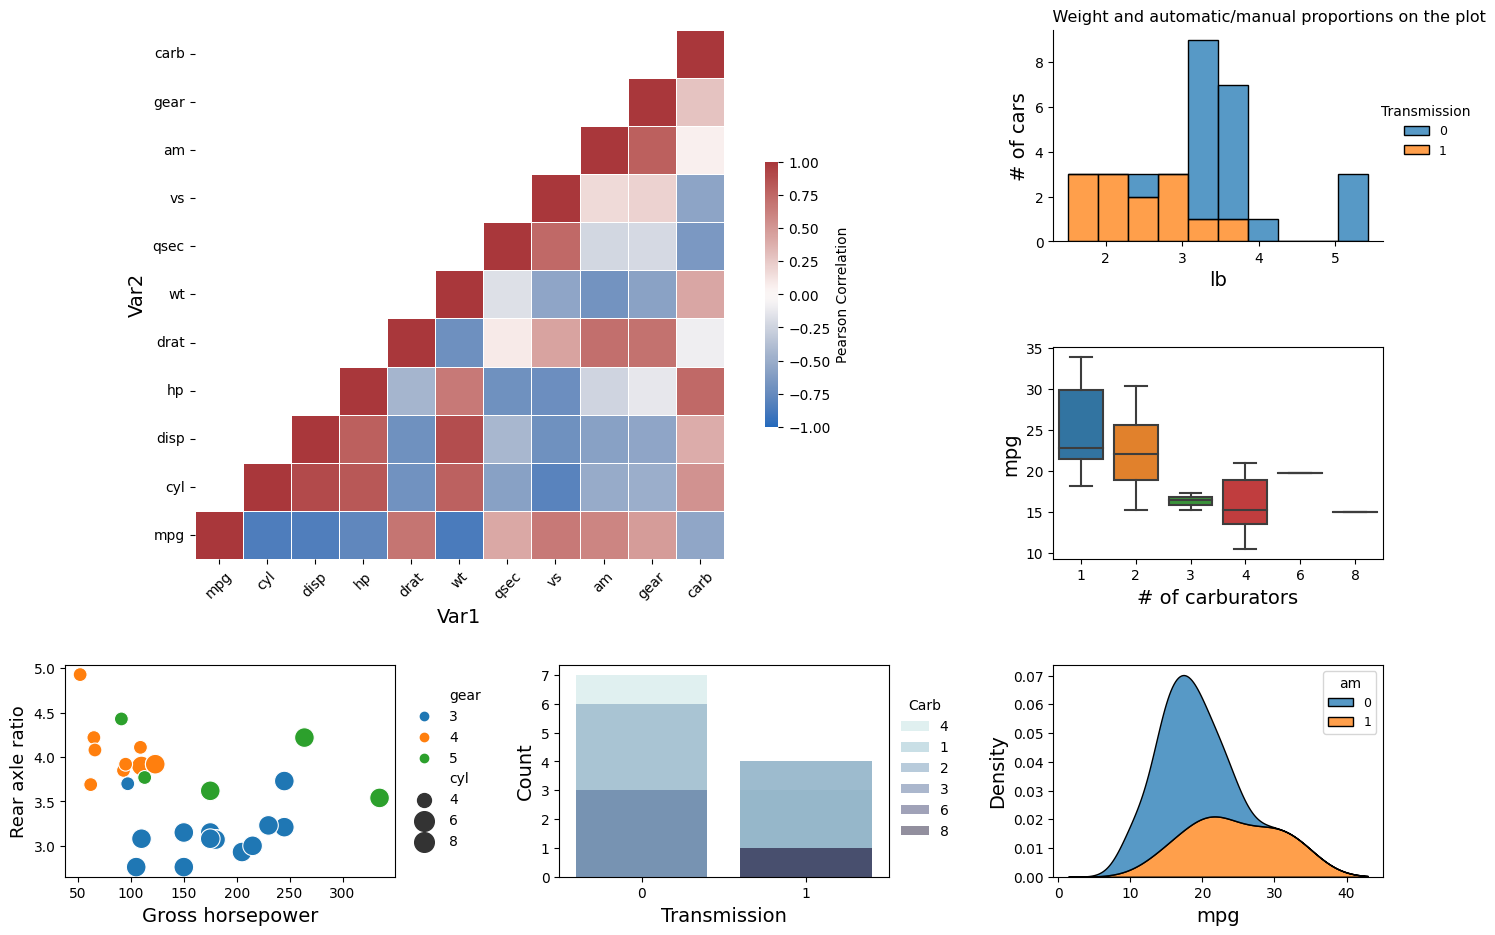

In [3]:
fig = plt.figure(figsize=(17, 11))
gs = fig.add_gridspec(nrows=3, ncols=3, wspace=0.5, hspace=0.5)
f_ax1 = fig.add_subplot(gs[:-1, :-1])
f_ax2 = fig.add_subplot(gs[0, 2])
f_ax5 = fig.add_subplot(gs[1, 2])
f_ax3 = fig.add_subplot(gs[2, 0])
f_ax4 = fig.add_subplot(gs[2, 1])
f_ax6 = fig.add_subplot(gs[2, 2])

corr_df = df.corr(numeric_only=True)
corr = corr_df.where(np.triu(np.ones(corr_df.shape)).astype(bool))
ax1 = sns.heatmap(corr, annot=False, cmap="vlag", square=True, linewidths=0.7,vmax=1, vmin=-1,\
                 cbar_kws={'label': 'Pearson Correlation', 'shrink' : 0.5, 'ticks' : np.arange(-1, 1.25, 0.25)},\
                 ax=f_ax1)
ax1.set_xlabel('Var1', fontdict={'size': 14})
ax1.set_ylabel('Var2', fontdict={'size': 14})
ax1.xaxis.tick_bottom()
ax1.yaxis.tick_left()
ax1.invert_yaxis()
ax1.tick_params(axis='x', rotation=45)
ax1.tick_params(axis='y', rotation=0)

ax2 = sns.histplot(x=df.wt, hue=df.am, multiple='stack', edgecolor='black', palette='tab10', bins=10, ax=f_ax2)
ax2.set_xlabel('lb', fontdict={'size': 14})
ax2.set_ylabel('# of cars', fontdict={'size': 14})
ax2.set_yticks([0, 2, 4, 6, 8])
ax2.set_xticks([2, 3, 4, 5])
ax2.set_title("                    Weight and automatic/manual proportions on the plot", fontsize=11.5)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
sns.move_legend(ax2, "upper right", bbox_to_anchor=(1.3, 0.7), title='Transmission', fontsize=9, frameon=False)

ax3 = sns.scatterplot(x=df.hp, y=df.drat, hue=df.gear, size=df.cyl, sizes=[100, 200, 200], palette='tab10',\
                      ax=f_ax3)
ax3.set_xlabel('Gross horsepower', fontdict={'size': 14})
ax3.set_ylabel('Rear axle ratio', fontdict={'size': 13})
sns.move_legend(ax3, "upper right", bbox_to_anchor=(1.3, 0.95), fontsize=10, frameon=False)

ax4 = sns.countplot(x=df.am, hue=df.carb, hue_order=[4, 1, 2, 3, 6, 8],\
                  palette='ch:start=.2,rot=-.3', saturation=1.7, alpha=0.5, dodge=False, ax=f_ax4)
ax4.set_xlabel('Transmission', fontdict={'size': 14})
ax4.set_ylabel('Count', fontdict={'size': 14})
ax4.set_yticks(range(8))
sns.move_legend(ax4, "upper right", bbox_to_anchor=(1.22, 0.9), frameon=False, fontsize=10, title="Carb")

ax5 = sns.boxplot(y=df.mpg, x=df.carb, palette='tab10', ax=f_ax5)
ax5.set_xlabel('# of carburators', fontdict={'size': 14})
ax5.set_ylabel('mpg', fontdict={'size': 14})

ax6 = sns.kdeplot(x=df.mpg, hue=df.am, multiple='stack', ax=f_ax6)
ax6.set_xlabel('mpg', fontdict={'size': 14})
ax6.set_ylabel('Density', fontdict={'size': 14})
ax6.set_yticks(np.arange(0, 0.07, 0.01))
sns.move_legend(ax6, "upper right", fontsize=9)